In [1]:
#loading necessary libraries
install.packages(c("tidyverse", "recipes"))
library(tidyverse)
library(recipes)
# GitHub link: https://github.com/tahsansamin/project_planning_stage_individual.git

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘recipes’


The following object is masked from ‘package:stringr’:

    fixed


The following object is masked from ‘package:stats’:

    step




# Dataset Descriptions

This dataset was collected by a computer science research team at UBC and revolves around how people play video games which was recorded through a MineCraft server.  

#### players.csv
"players.csv" contains 196 observations and 7 variables: 

1. **experience**: players experience in 5 categories: Pro, Veteran, Amateur, Regular and Beginner(character data type).
2. **susbcribe**: TRUE if player has subscribed to newsletter and FALSE otherwise(logical data type).
3. **hashedEmail**: encrypted email address of player(character data type). 
4. **played_hours**: number of hours spent on the game by the player(double data type).  
5. **name**: name of player(character data type).
6. **gender**: gender of player with unique values: male , female, non-binary, prefer not to say, agender, two-spirited or other(character data type).
7. **Age of player**: age of the player(double data type).



### Potential issues with players.csv 

1.The "experience" and "gender" variables should be changed from character data type to the factor data type. 

2.The "hashedEmail" and "name" variables should be deleted because they contain personal information.  

        

In [2]:
players <- read_csv("https://raw.githubusercontent.com/tahsansamin/project_planning_stage_individual/refs/heads/main/dataset/players.csv", show_col_types = FALSE)
head(players)

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


#### sessions.csv
"sessions.csv" consists of 1535 observations and 5 variables:  

1. **hashedEmail** : hashed email address of players(character data type).
2. **start_time** : date and time of when player started gaming session(character data type).
3. **end_time** : date and time of when player stopped gaming session(character data type).
4.  **original_start_time** : unix timestamp of when player started session(double data type).
5. **original_end_time** : unix timestamp of when player ended gaming session(double data type).

### Potential issues with sessions.csv 

1. The hashedEmail variable should be removed for privacy.
2. start_time and end_time should each be split into two columns because they contain both date and time. The newly split columns should each be changed to either date or time format.

In [3]:
sessions <- read_csv("https://raw.githubusercontent.com/tahsansamin/project_planning_stage_individual/refs/heads/main/dataset/sessions.csv", show_col_types = FALSE)
head(sessions)

hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


### Summary Statistics

#### Players.csv

| Variable | Minimum | Maximum | Mean |
| -------- | ------- | -------- | -----|
| Age | 9.00 | 58.00 | 21.14 |
| played_hours | 0.00 | 223.10 | 5.85 |

#### sessions.csv

| Variable | Minimum | Maximum | Mean |
| -------- | ------- | -------- | -----|
| original_start_time | 1.71e+12 | 1.73e+12	 | 1.72e+12	 |
| original_end_time | 1.71e+12 | 1.73e+12 | 1.72e+12 |


In [4]:
summary_stats_players <- players |> 
                summarise(min_Age = min(Age, na.rm = TRUE),max_Age = max(Age, na.rm = TRUE),mean_age = mean(Age, na.rm = TRUE), min_played_hours = min(played_hours),max_played_hours = max(played_hours), 
                         , mean_played_hours = mean(played_hours, na.rm = TRUE))
summary_stats_players
summary_stats_sessions <- sessions |> 
                summarise(min_original_start_time = min(original_start_time, na.rm = TRUE), max_original_start_time = max(original_start_time, na.rm = TRUE), mean_original_start_time = mean(original_start_time, na.rm = TRUE),
                         min_original_end_time = min(original_end_time, na.rm = TRUE), max_original_end_time = max(original_end_time, na.rm = TRUE), mean_original_end_time = mean(original_end_time, na.rm = TRUE))

summary_stats_sessions

min_Age,max_Age,mean_age,min_played_hours,max_played_hours,mean_played_hours
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
9,58,21.13918,0,223.1,5.845918


min_original_start_time,max_original_start_time,mean_original_start_time,min_original_end_time,max_original_end_time,mean_original_end_time
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.7124e+12,1.72733e+12,1.719201e+12,1.7124e+12,1.72734e+12,1.719196e+12


There are two NA values in players.csv and 4 NA values in sessions.csv.

In [5]:
na_players <- sum(is.na(players))
na_sessions <- sum(is.na(sessions))
na_players
na_sessions

[1] 2

[1] 4

# Questions
**Broad question:**
        *What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ            between various player types?* **Specifically** *can player age and number of hours played be used to predict their gaming newsletter subscription status?*

Players.csv will be used because it contains more relevant variables than sessions.csv. The name and hashed email variables will be removed for confidentiality. A subset of data will be created with the age, number of hours and susbcription variables. The rows with missing values will be removed. The hours played and age variables will be standardized to be on comparable scales.

# Explaratory Data Analysis and Visualizations
The data already satisfies all criteria for being tidy

In [6]:
tidy_players <- players
head(tidy_players)

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


#### Table Summarizing mean of quantitative variables

| Variable | Mean |
| -------- | -----|
| Age | 21.14 |
| played_hours | 5.85 |



### Visualization 1: Number of Hours played against player age

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


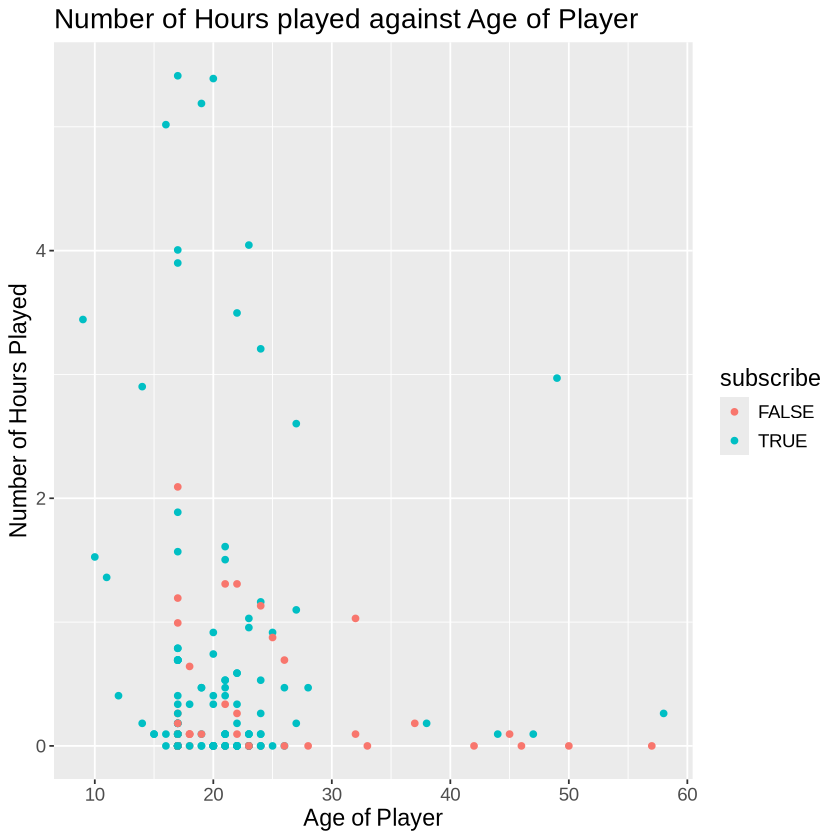

In [7]:
figure_1 <- tidy_players |>
            ggplot(aes(x = Age, y= log1p(played_hours), color = subscribe)) +
            geom_point() +
            labs(x = "Age of Player", y = "Number of Hours Played", title = "Number of Hours played against Age of Player") +
            theme(text = element_text(size = 14)) 
#log1p was added after discussion with a TA on how to make both variables on comparable scales.
#standardising and centering the variables did not work in making the variables comparable so log1p was suggested by the TA
figure_1

There seems to be a data imbalance with fewer observations for false subscription statuses. There are also a few outliers for the number of hours played.

### Visualization 2: Mean number of hours played for each subscription group

Warning message in geom_text(aes(label = format(round(mean_hours, 2)), figures = 2), :
“Ignoring unknown aesthetics: figures”


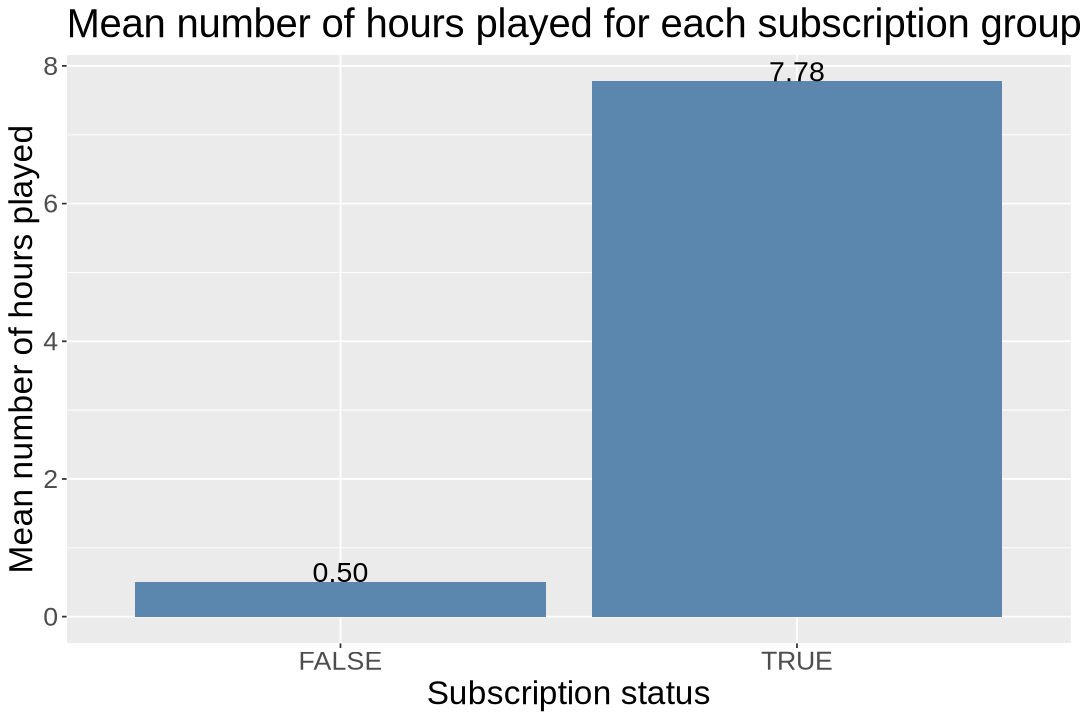

In [8]:
options(repr.plot.width = 9, repr.plot.height = 6)
means_for_subscription_status <- tidy_players |>
            group_by(subscribe) |>
            summarise(mean_hours  = mean(played_hours)) |> 
            ggplot(aes(x = subscribe, y = mean_hours)) +
            geom_bar(stat = "identity", fill = "#5B86AE") +
            geom_text(aes(label = format(round(mean_hours, 2)), figures = 2), vjust = 0, size = 6)+
            labs(x = "Subscription status", y = "Mean number of hours played", title = "Mean number of hours played for each subscription group")+
            theme(text = element_text(size = 20))

means_for_subscription_status


### Visualization 3: Mean age for each subscription status

Warning message in geom_text(aes(label = format(round(mean_age, 2)), figures = 2), :
“Ignoring unknown aesthetics: figures”


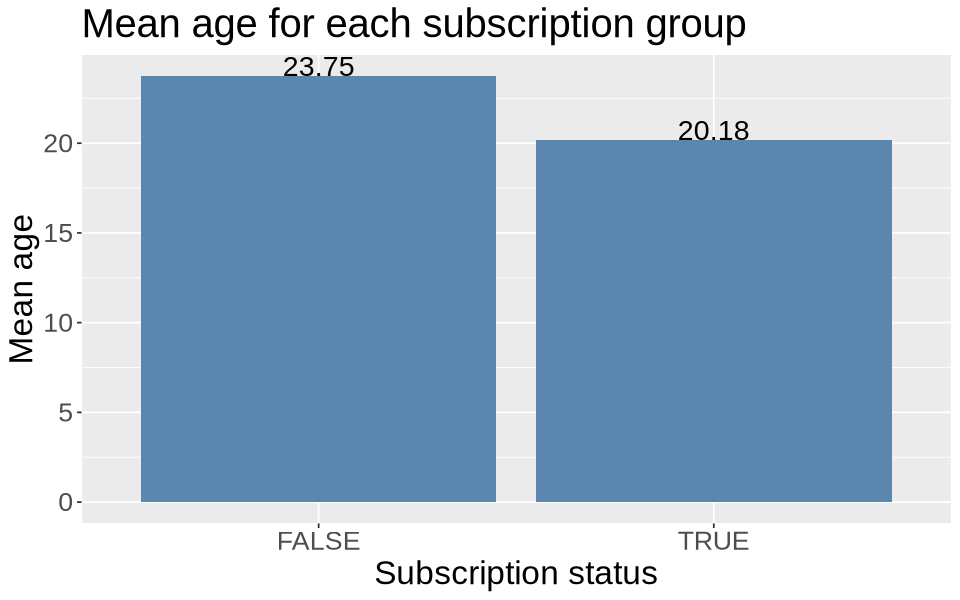

In [9]:
options(repr.plot.width = 8, repr.plot.height = 5)
means_for_subscription_status0 <- tidy_players |>
            group_by(subscribe) |>
            summarise(mean_age  = mean(Age, na.rm = TRUE)) |> 
            ggplot(aes(x = subscribe, y = mean_age)) +
            geom_bar(stat = "identity", fill = "#5B86AE") +
            geom_text(aes(label = format(round(mean_age, 2)), figures = 2), vjust = 0, size = 6)+
            labs(x = "Subscription status", y = "Mean age", title = "Mean age for each subscription group")+
            theme(text = element_text(size = 20))

means_for_subscription_status0

### Visualization 4: Mean number of hours played per age group

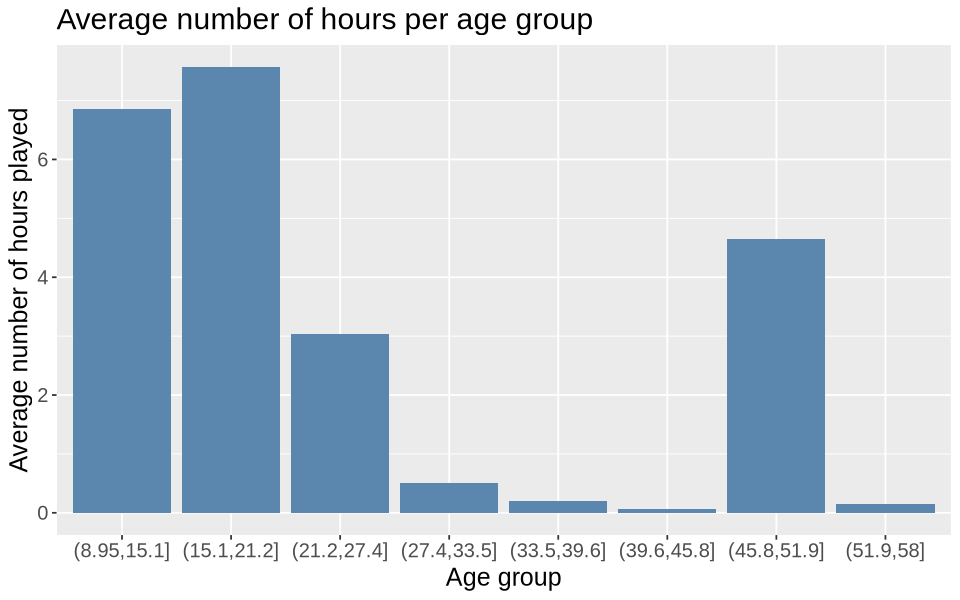

In [10]:
options(repr.plot.width = 8, repr.plot.height = 5)
hoursperage <- tidy_players |>
                    filter(!is.na(Age)) |>
                   mutate(age_grp = cut(Age, breaks = 8)) |>
                    group_by(age_grp) |>
                    summarise(mean_hours = mean(played_hours)) |>
                    ggplot(aes(x = age_grp, y = mean_hours)) +
                    geom_bar(stat = "identity", fill = "#5B86AE") +
                    labs(x = "Age group", y = "Average number of hours played", title = "Average number of hours per age group")+
                    theme(text = element_text(size = 15))
hoursperage

The number of hours played generally decreases with age with a few exceptions.

# Methods and Planning

KNN classification will be used because the hours played and age of a player are numerical and predicting subscription status is a classification problem .

##### Assumptions of the model
KNN few assumptions. It assumes that the closer two given data points are the more related and similar they are to each other.

##### Limitations of KNN classification
KNN is computationally inefficient for large datasets. Furthermore, KNN classification may not perform well if the classes are imbalanced.

##### How to compare and select the model?
5 fold cross validation with a range of Ks will be used to select the model based on the highest cross validation accuracy.

##### Splitting the data
The data will be split into 75% training data and 25% testing data after converting it to a tidy format. 5 fold cross validation will be applied to the training data.